In [2]:
documents = []

ego_id = '40379006'

file = open('Textos para testes/egos/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()

file = open('Textos para testes/alters/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [4]:
from sklearn.decomposition import NMF

no_topics = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.7, init='nndsvd').fit(tf)

In [6]:
import numpy as np
import pandas as pd

# Show top n keywords for each topic
def show_topics(vectorizer=tf_vectorizer, model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, model=nmf, n_words=12)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11
Topic 0,god,good,know,trust,gift,pray,lord,plan,say,place,mean,hand
Topic 1,love,like,live,heart,church,friends,jesus,change,feel,fall,hate,sin
Topic 2,leaders,goal,lead,best,leadership,leader,don,team,room,inspire,believe,remember
Topic 3,gt,yes,sure,perfect,classy,little,ladies,faith,checkout,bracelet,elevated,lord
Topic 4,time,want,good,hard,feel,difficult,30pm,quit,bad,hope,live,forget
Topic 5,people,know,say,read,think,need,church,stop,help,tweet,lord,hate
Topic 6,life,live,jesus,come,don,way,faith,let,stay,want,bring,truth
Topic 7,make,look,looking,feel,good,like,say,better,happy,try,man,plan
Topic 8,day,great,know,think,small,success,efforts,repeat,sum,robert,collier,today
Topic 9,new,live,come,video,checkout,bracelet,album,ps,old,watch,check,blog


In [21]:
# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(np.round(nmf.components_, 2))

# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# Vie
#list_frames = []
for t, row in df_topic_keywords.iterrows():
    aux = row.nlargest(12)
    #list_frames.append(aux.to_frame().T)
    print(t)
    a = ''
    for word, weight in aux.items():
        a += ' ' + word + ' (' + str(weight) + ') |'
    print(a)
    print('\n')

#list_frames[1] 

Topic0
 god (7.12) | good (0.49) | know (0.48) | trust (0.42) | gift (0.39) | pray (0.37) | lord (0.3) | plan (0.28) | say (0.28) | place (0.27) | mean (0.26) | hand (0.25) |


Topic1
 love (6.37) | like (0.45) | live (0.42) | church (0.27) | heart (0.27) | friends (0.25) | jesus (0.24) | change (0.23) | feel (0.22) | fall (0.2) | hate (0.19) | sin (0.18) |


Topic2
 leaders (3.61) | goal (3.28) | lead (0.98) | best (0.56) | leadership (0.43) | leader (0.37) | don (0.3) | team (0.28) | room (0.27) | inspire (0.26) | believe (0.21) | remember (0.2) |


Topic3
 gt (4.49) | yes (2.17) | sure (1.65) | perfect (0.67) | classy (0.47) | little (0.39) | faith (0.38) | ladies (0.38) | bracelet (0.37) | checkout (0.37) | elevated (0.34) | lord (0.31) |


Topic4
 time (5.02) | want (0.73) | good (0.7) | hard (0.47) | feel (0.44) | difficult (0.32) | 30pm (0.29) | quit (0.29) | bad (0.28) | hope (0.27) | live (0.25) | forget (0.24) |


Topic5
 people (5.38) | know (0.65) | say (0.5) | read (0.49) 

In [13]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(nmf_output, columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head(15)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Doc1,0.000000,0.002949,0.006891,0.000000,0.016037,0.008970,0.000000,0.030748,0.000000,0.009600,7
Doc2,0.001595,0.002553,0.009785,0.075839,0.000000,0.005745,0.008488,0.000254,0.001817,0.000073,3
Doc3,0.124777,0.000000,0.000000,0.000000,0.598961,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc4,0.000000,0.000970,0.005426,0.000000,0.001923,0.000000,0.000000,0.000229,0.000000,0.000201,2
Doc5,0.000428,0.000000,0.001466,0.000000,0.000689,0.000000,0.004691,0.000000,0.000000,0.009929,9
Doc6,0.004917,0.008024,0.000198,0.008840,0.000000,0.010500,0.014324,0.005871,0.009272,0.010988,6
Doc7,0.000000,0.000135,0.000000,0.000000,0.000125,0.000000,0.000000,0.000000,0.009270,0.000000,8
Doc8,0.276417,0.000000,0.023458,0.000000,0.000000,0.000000,0.001908,0.000000,0.011077,0.000000,0
Doc9,0.147521,0.000000,0.007860,0.003527,0.001052,0.007358,0.016208,0.000000,0.001910,0.011749,0


In [14]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,584
1,6,301
2,9,295
3,8,283
4,7,277
5,5,216
6,4,203
7,1,199
8,2,191
9,3,170


In [26]:
#Documents of topic that classified most documents (First on the table above)

dominant_topic = df_document_topic['dominant_topic']

topic = df_topic_distribution['Topic Num'][0]

test_text = []
for i, doc in enumerate(dominant_topic):
    if doc == topic:
        print('- ' + documents[i] + '  ')
        test_text.append(documents[i])

- ARE CHEER PERFORMANCE TIGHTROPE FT 
  
- LIGHT FIRE INSIDE YOU SEED ALMIGHTY GOD DON ALLOW SOMETHING SMALL KEEP GOD BEST 
  
- WALK GIFT CALL DON COMPARE OTHERS GOD NEED YOU 
  
- THE RIGHTEOUSNESS COME GOD FAITH PHIL 3 9 
  
- HAHAHAHHA 
  
- 1 COR 13 5 IT DISHONOR OTHERS SELF SEEK EASILY ANGER KEEP RECORD WRONG 
  
- BE CONTENT GOD SAY NEVER I LEAVE NEVER I FORSAKE HEBREWS 13 5 
  
- BASICALLY 
  
- NO PASSPORT REQUIRE 
  
- GOD GOOD 
  
- I GON PRAISE PRAISE TIL I GO 
  
- ADIDASORIGINALS LATEST NMD COLORWAY R1 BLUE HIT STOCKISTS SOON 
  
- DON SHOW GOD BIG PROBLEMS SHOW PROBLEMS BIG GOD 
  
- GOD GREAT 
  
- IF ACCEPT GOD ASK TROUBLE FORGE AHEAD WITHOUT PROMISE PROTECTION 
  
- STEPHENCURRY30 FIRST UNANIMOUS MVP 
  
- JUST SEE GO ANYMORE MEAN GOD CHANGE DESTINATION 
  
- GOD PLAN BIGGER MISTAKE 
  
- IF GO PRAY RAIN COMPLAIN MUD FACT REVIVAL 
  
- SUCH AMAZING BAPTISMAL SERVICE TONIGHT GOD MOVE 
  
- NONE 
  
- TRAVEL MUCH 
  
- WHEN TELL LESS IS MORE 
  
- NUMBER ONE RULE LOFT 


Text(0.5,1,'Segregation of Topic Clusters')

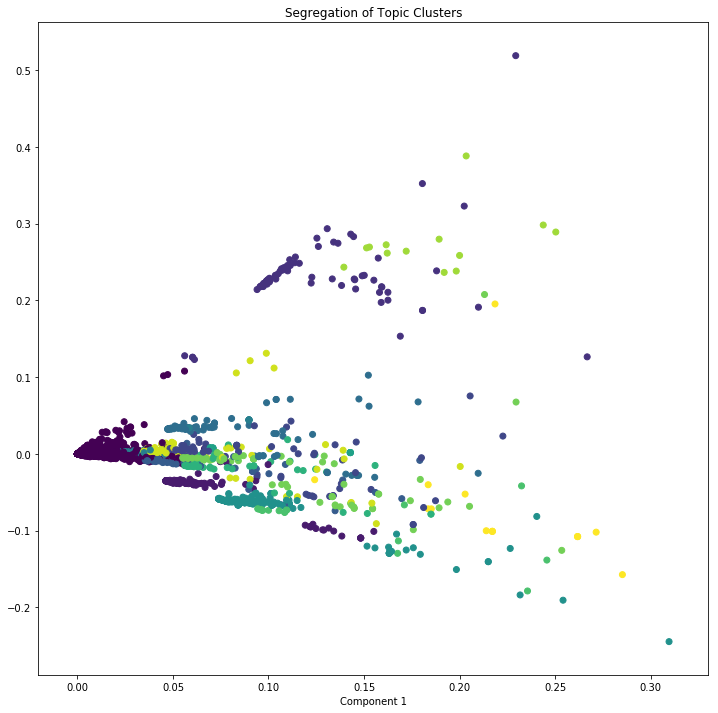

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [27]:
#Vectorize transform
text = tf_vectorizer.transform(test_text)

#LDA Transform
topic_probability_scores = nmf.transform(text)

for i, doc in enumerate(topic_probability_scores):
    if not np.argmax(doc) == topic:
        print(np.argmax(doc))
        print(test_text[i])
        print(doc)

In [23]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += "  ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

no_top_words = 12
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: god  good  know  trust  gift  pray  lord  plan  say  place  mean  hand
Topic #1: love  like  live  heart  church  friends  jesus  change  feel  fall  hate  sin
Topic #2: leaders  goal  lead  best  leadership  leader  don  team  room  inspire  believe  remember
Topic #3: gt  yes  sure  perfect  classy  little  ladies  faith  checkout  bracelet  elevated  lord
Topic #4: time  want  good  hard  feel  difficult  30pm  quit  bad  hope  live  forget
Topic #5: people  know  say  read  think  need  church  stop  help  tweet  lord  hate
Topic #6: life  live  jesus  come  don  way  faith  let  stay  want  bring  truth
Topic #7: make  look  looking  feel  good  like  say  better  happy  try  man  plan
Topic #8: day  great  know  think  small  success  efforts  repeat  sum  collier  robert  today
Topic #9: new  live  come  video  checkout  bracelet  album  ps  old  watch  check  blog

